## 1) Problem statement.

**Data:** Sensor Data

**Problem statement :**
- The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.

- The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

|True class | Positive | Negative | |
| ----------- | ----------- |   |  |
|<b>Predicted class</b>||| |
| Positive      |   -       | cost_1  |    |
| Negative   | cost_2        |  | |


Cost 1 = 10 and Cost 2 = 500

- The total cost of a prediction model the sum of `Cost_1` multiplied by the number of Instances with type 1 failure and `Cost_2` with the number of instances with type 2 failure, resulting in a `Total_cost`. In this case `Cost_1` refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while `Cost_2` refer to the cost of missing a faulty truck, which may cause a breakdown. 
- `Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.`

- It is done in order to reduce the False Positive (FP) and False Negative (FN).

## 2) Import required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

## Read Data

In [3]:
df = pd.read_csv('aps_failure_training_set1.csv',na_values='na')

In [4]:
df.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
5,pos,1056758,0.0,42328.0,856.0,0.0,0.0,0.0,50394.0,184552.0,...,1450086.0,713608.0,1750894.0,4054554.0,4096660.0,2295880.0,220478.0,482.0,0.0,0.0
6,pos,361638,0.0,280.0,NaN,0.0,0.0,0.0,0.0,0.0,...,266410.0,114746.0,180006.0,108294.0,111218.0,264410.0,33734.0,0.0,0.0,0.0
7,pos,791254,NaN,NaN,NaN,NaN,NaN,0.0,14868.0,921256.0,...,3625532.0,1380864.0,3262488.0,5727988.0,7563752.0,12114820.0,264714.0,198.0,NaN,NaN
8,pos,1053152,NaN,NaN,NaN,NaN,NaN,2.0,2.0,30.0,...,7093206.0,3379622.0,7362340.0,8442584.0,8120144.0,5082396.0,6259760.0,176752.0,NaN,NaN
9,pos,785270,NaN,NaN,8994.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [5]:
# checking the shape (count of rows and columns) of the dataset
df.shape

(36188, 171)

In [6]:
#check the unique values of target variable (binary classification)

df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [7]:
# Define the numerical and categorical columns from the dataset
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the numerical and categorical columns
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 170 numerical features: ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000',

##### As this is a sensor data. Interpretation of the data is not required

## Check Missing Values

In [8]:
df.isna().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

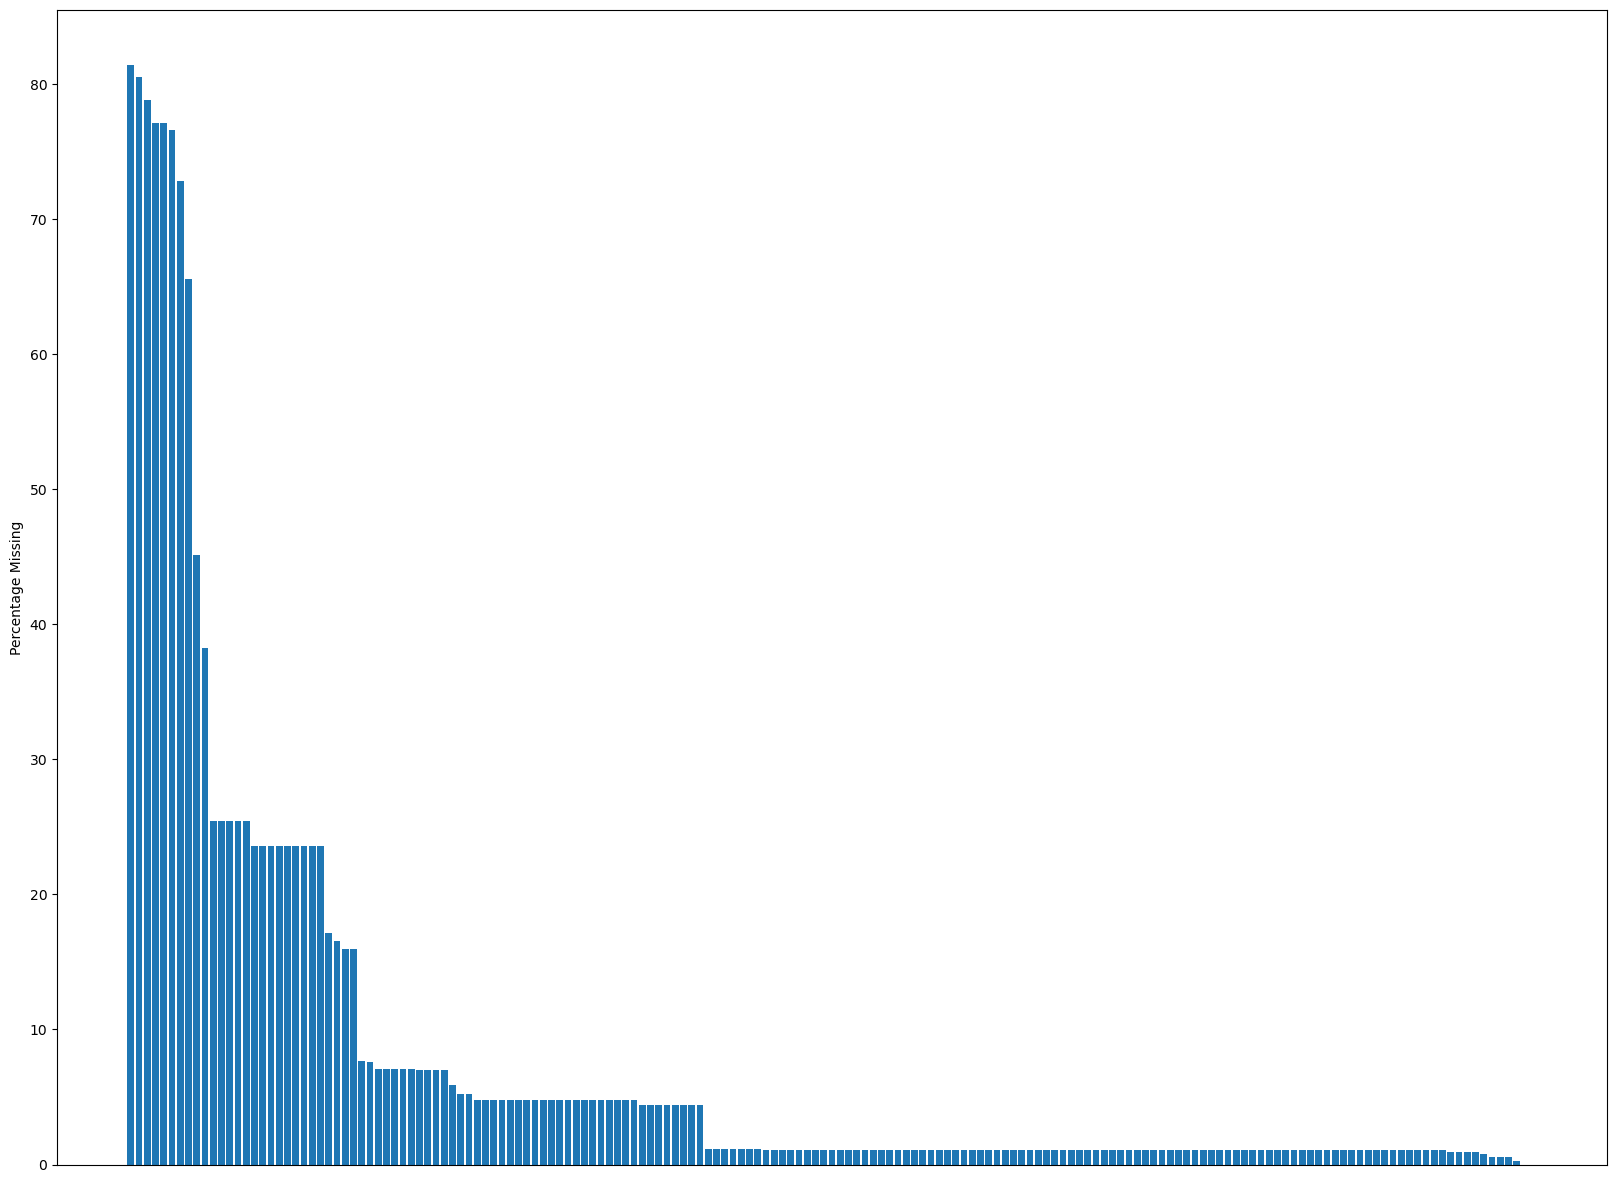

In [9]:
# plot missing values count for each of the columns

fig, ax = plt.subplots(figsize = (20,15))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel('Percentage Missing')
plt.show()

Here we can see that there are a lot of missing values present in each of the columns.

## Drop those columns which has more than 70% of missing values

In [10]:
# Drop those columns which has more than 70% of missing values

drop_cols = missing[missing[0]>70]
drop_cols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [11]:
df.drop(list(drop_cols.index), axis = 1, inplace= True)

Now you can see that 7 columns has been dropped.

In [12]:
df.shape

(36188, 164)

the columns count has been dropped from 171 -> 164.

### Check the total percentage of missing values of full dataset after dropping columns with more than 70% of missing values

In [13]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

#percent of data that is missing
print(f'Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%')

Percentage of total missing cells in the data 5.37059852747306%


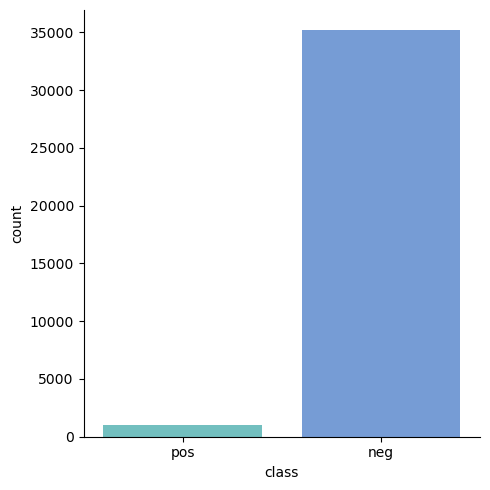

Positive: 1000, Negative: 35188


In [14]:
## Visualisation of unique Values in the Target Variable 'class'

pos = df[df['class']== 'pos'].shape[0]
neg = df[df['class']== 'neg'].shape[0]

sns.catplot(data= df, x='class', kind='count', palette = 'winter_r', alpha=0.6)
plt.show()

print('Positive: '+str(pos) + ', Negative: '+str(neg))

Here, we can see that there is an imbalanced data

**Report**
- The target classes are highly imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

## Create Functions for model training and evaluation

In [15]:
def evaluate_clf(true, predicted):
    
    '''
    This function takes the true value (y_true) and predicted value (y_pred)
    and returns the measure of Evaluation metrics such as accuracy, f1-score, precision, recall, roc_auc
    '''
    
    acc = accuracy_score(true, predicted) # calculating the Accuracy of the model
    f1 = f1_score(true, predicted) # calculating the F1 score
    precision = precision_score(true, predicted) # calculating the precision score
    recall = recall_score(true, predicted) # calculating the recall 
    roc_auc = roc_auc_score(true, predicted) # calculate the ROC and AUC value
    
    return acc, f1, precision, recall, roc_auc

In [16]:
def total_cost(y_true, y_pred):
    '''
    it takes y_true, y_pred and prints Total cost due to misclassification
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10 * fp + 500 * fn
    return cost

#### what does ravel() do?

- The ravel() function in NumPy is used to flatten multi-dimensional arrays into a one-dimensional array. 
- When applied to a multi-dimensional array, ravel() returns a flattened view of the array, meaning it returns a new array that contains the same data as the original array but reshaped into a one-dimensional array.
- In the context of confusion matrices in scikit-learn, the confusion matrix is typically a 2x2 array where rows represent actual classes and columns represent predicted classes.
- When you apply ravel() to the confusion matrix obtained from confusion_matrix(), it flattens this 2x2 array into a one-dimensional array, resulting in an array with the counts of TN, FP, FN, and TP.

In [17]:
# create a function which can evaluate models and return a report summary

def evaluation_models(X, y, models):
    
    # split the dataset into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    # creating an empty array
    cost_list = []
    models_list = []
    accuracy_list =[]
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, Y_train) # training the model
        
        # Make the prediction
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision,\
        model_train_recall, model_train_roc_auc_score = evaluate_clf(Y_train, Y_train_pred)
        train_cost = total_cost(Y_train, Y_train_pred)
        
        # Testing set performnace 
        model_test_accuracy, model_test_f1, model_test_precision,\
        model_test_recall, model_test_roc_auc_score = evaluate_clf(Y_test, Y_test_pred)
        test_cost = total_cost(Y_test, Y_test_pred)
        
        print(list(model.keys())[i])
        model_list.append(list(models.keys())[i])
        
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report = pd.DataFrame(list(zip(model_list, cost_list)))
    
    return report   

### Plot  distribution of all Independent Numerical variables

In [18]:
'''
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15,125))

for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color = 'indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()
    
    '''

"\nnumeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']\n\nplt.figure(figsize=(15,125))\n\nfor i, col in enumerate(numeric_features):\n    plt.subplot(60, 3, i+1)\n    sns.distplot(x=df[col], color = 'indianred')\n    plt.xlabel(col, weight='bold')\n    plt.tight_layout()\n    \n    "

**Report**
- As per the above plot most of the features are not normally distributed.
- Transformation of data is not of prime importance since it is a classification problem.
- Interpreting each and every column is not necessary as this is sensor data.

## Evaluate Model on Different experiments

In [19]:
# splitting X and Y for all Experiments

X = df.drop('class', axis = 1)
Y = df['class']
X

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,153204,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,453236,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,72504,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,762958,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,8123016.0,18022646.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,695994,NaN,NaN,NaN,NaN,0.0,0.0,0.0,55620.0,1190014.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [20]:
# Manually mapping the target variable instad of performing LabelEncoder, One-hot encoding

Y = Y.replace({'pos' : 1, 'neg' : 0})
Y

0        1
1        1
2        1
3        1
4        1
        ..
36183    0
36184    0
36185    0
36186    0
36187    0
Name: class, Length: 36188, dtype: int64

### Experiment: 1 = KNN Imputer for Null values

**what is Robust scaler?**

- The Robust Scaler is a data preprocessing technique used in machine learning to scale features (variables) so that they're centered around median and scaled according to the Interquartile Range (IQR).

- This scaling method is robust to outliers in the data, meaning it can handle instances where outliers are present without skewing the scaling process significantly.

-  The Robust Scaler subtracts the median value of each feature from the data. This ensures that the scaled data is centered around zero.

**Why Robust scaler and not Standard scaler?**
- Scaling the data using Robust scaler
- Since most of the independent variables are not normally distributed we cannot use Standardscaler.

**Why Robust Scaler and not Minmax?** 
- because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [21]:
# Fit the robust scaler for KNN best selection experiment

robustscaler = RobustScaler()

X1 = robustscaler.fit_transform(X)

In [22]:
X1

array([[ 2.48316651e+00,  3.16455696e-02,             nan, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.58106804e+00,  2.92616034e+00,             nan, ...,
         3.42616452e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.43005945e-01,  1.52109705e+00,  2.26470588e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.28301407e-01,  2.24758046e+06, -2.69607843e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00129058e+00,  2.24758046e+06,  8.97058824e-01, ...,
         1.92478692e+02,  0.00000000e+00,  0.00000000e+00],
       [ 1.86901072e-01,  5.75949367e-01,  1.22549020e+00, ...,
         7.82953419e-02,  0.00000000e+00,  0.00000000e+00]])

**What is KNN Imputer?**

- The KNN (K-Nearest Neighbors) imputer is a technique used to impute (fill in) missing values in a dataset by using the information from the dataset itself. 

- KNN imputation works by finding the k nearest neighbors for each observation with missing values and then averaging or taking a weighted average of those neighbors' values to impute the missing value.

- KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.

- Here we Iterates through different K values and get accuracy and choose best K values.

#### Finding the optimal n_neighbour value for KNN imputer

In [23]:

'''
results = []

#define imputer
imputer = KNNImputer(n_neighbors= 5, weights = 'uniform', metric = 'nan_euclidean')

# different values of parameter
strategies = [str(i) for i in [1,3,5,7,9]]

for s in strategies:
    pipeline = Pipeline(steps = [('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, Y, scoring = 'accuracy', cv = 2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))
    
'''

"\nresults = []\n\n#define imputer\nimputer = KNNImputer(n_neighbors= 5, weights = 'uniform', metric = 'nan_euclidean')\n\n# different values of parameter\nstrategies = [str(i) for i in [1,3,5,7,9]]\n\nfor s in strategies:\n    pipeline = Pipeline(steps = [('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])\n    scores = cross_val_score(pipeline, X1, Y, scoring = 'accuracy', cv = 2, n_jobs=-1)\n    results.append(scores)\n    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))\n    \n"

**We can observe n_neighbors = 3 is able to produce the highest accuracy**

### Pipeline for KNN Imputer

In [24]:
num_features = X.select_dtypes(exclude='object').columns

# fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [25]:
X_knn = knn_pipeline.fit_transform(X)

In [ ]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, Y)

**handling The Imbalanced data**

 **SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
 
 - This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class
 
 - To add new data of minority class
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - To remove the tomek links of the majority class
 1. Choose random data from the majority class.
 2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
 
 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.